In [1]:
%matplotlib inline

In [3]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Timestamp

import re

import hillmaker as hm

In [24]:
file_stopdata = 'data/unit_stop_log_Experiment1_Scenario1_Rep1.csv'

scenario_name = 'log_unitocc_test_steadystate'
in_fld_name = 'EnteredTS'
out_fld_name = 'ExitedTS'
cat_fld_name = 'Unit'
start_analysis = '6/24/2015 00:00'
end_analysis = '6/16/2016 00:00'

# Optional inputs

tot_fld_name = 'OBTot'
bin_size_mins = 1440
includecats = ['Obs','LDR','PP']



In [4]:
rx = re.compile(r'Scenario([0-9]){1,3}_Rep([0-9]){1,2}')

In [38]:
stops_df = pd.read_csv(file_stopdata,index_col=0)
basedate = Timestamp('20150215 00:00:00')
stops_df['EnteredTS'] = stops_df.apply(lambda row:
                           Timestamp(round((basedate + pd.DateOffset(hours=row['Entered'])).value,-9)), axis=1)

stops_df['ExitedTS'] = stops_df.apply(lambda row:
                          Timestamp(round((basedate + pd.DateOffset(hours=row['Exited'])).value,-9)), axis=1)

stops_df = stops_df[stops_df[cat_fld_name].isin(includecats)]

start_analysis_dt = pd.Timestamp(start_analysis)
end_analysis_dt = pd.Timestamp(end_analysis)

stops_df.shape 

(49575, 16)

In [39]:
# Now filter the stops dataframe so only records that will count for occupancy are included. This
# will allow us to analyze the blocking related columns directly (since no blocking during warmup will be included)
stops_df = stops_df[(stops_df['EnteredTS'] <= end_analysis_dt) & (stops_df['ExitedTS'] >= start_analysis_dt)]
stops_df.shape 

(17631, 16)

In [5]:
m = re.search(rx, file_stopdata)

scenario_num = m.group(1)
rep_num = m.group(2)

print (scenario_num, rep_num)

1 1


In [6]:
fn_bydatetime = 'testing/bydatetime_' + scenario_name + '.csv'
fn_occ_summary = 'testing/occ_stats_summary_' + scenario_name + '.csv'
fn_arr_summary = 'testing/arr_stats_summary_' + scenario_name + '.csv'
fn_dep_summary = 'testing/dep_stats_summary_' + scenario_name + '.csv'

In [27]:
hm.run_hillmaker(scenario_name,stops_df,in_fld_name, out_fld_name,cat_fld_name,start_analysis,end_analysis,tot_fld_name,bin_size_mins,categories=includecats,outputpath='./testing')

min of intime: 2015-02-15 00:00:00
max of outtime: 2017-11-10 23:33:11
rng_bydt created: 0.0071
using specified categories: 0.0231
Seeded bydatetime DataFrame created: 0.0533
dayofweek, bin_of_day, bin_of_week computed: 0.0819
Multi-index on bydatetime DataFrame created: 0.0839
Multi-index fully lexsorted: 0.0858
Latest edits at 2015-07-07 08:26:45.380717
Num inner: 17552
{'left': 35, 'inner': 17552, 'right': 44}
Done processing 17631 stop recs: 14.7413
Done adding totals: 14.8043
Done with summary stats: 49.73605
Done with overall summary stats: 49.871479


In [40]:
hm.run_hillmaker(scenario_name,stops_df,in_fld_name, out_fld_name,cat_fld_name,start_analysis,end_analysis,tot_fld_name,bin_size_mins,categories=includecats,outputpath='./testing')

min of intime: 2015-06-12 17:06:07
max of outtime: 2016-06-27 20:40:20
rng_bydt created: 0.0038
using specified categories: 0.0110
Seeded bydatetime DataFrame created: 0.0277
dayofweek, bin_of_day, bin_of_week computed: 0.0621
Multi-index on bydatetime DataFrame created: 0.0652
Multi-index fully lexsorted: 0.0692
Latest edits at 2015-07-07 09:09:59.825809
Num inner: 17552
{'left': 35, 'inner': 17552, 'right': 44}
Done processing 17631 stop recs: 13.7587
Done adding totals: 13.7851
Done with summary stats: 110.532059
Done with overall summary stats: 110.667795


In [28]:
occ_df = pd.read_csv(fn_occ_summary)

In [29]:
bydt_df = pd.read_csv(fn_bydatetime)

In [12]:
def num_gt_0(column):
    return (column != 0).sum()

def get_stats(group, stub=''):
    return {stub+'count': group.count(), stub+'mean': group.mean(),
            stub+'min': group.min(), stub+'num_gt_0': num_gt_0(group),
            stub+'max': group.max(), stub+'stdev': group.std(), 
            stub+'p01': group.quantile(0.01), stub+'p025': group.quantile(0.025),
            stub+'p05': group.quantile(0.05), stub+'p25': group.quantile(0.25),
            stub+'p50': group.quantile(0.5), stub+'p75': group.quantile(0.75),
            stub+'p90': group.quantile(0.9), stub+'p95': group.quantile(0.95),
            stub+'p975': group.quantile(0.975), stub+'p99': group.quantile(0.99)}

In [10]:
pp_occ = bydt_df[(bydt_df['category'] == 'PP')]['occupancy']

In [18]:
pp_occ.describe()

count    359.000000
mean      35.928327
std        4.930759
min       22.050231
25%       32.463605
50%       35.783588
75%       39.436146
max       46.000000
Name: occupancy, dtype: float64

In [13]:
get_stats(pp_occ)

{'count': 359,
 'max': 46.0,
 'mean': 35.9283265629836,
 'min': 22.050231481481489,
 'num_gt_0': 359,
 'p01': 25.770185648148146,
 'p025': 26.367486111111116,
 'p05': 27.656700231481484,
 'p25': 32.463605324074081,
 'p50': 35.783587962962962,
 'p75': 39.436145833333327,
 'p90': 42.362648148148139,
 'p95': 44.468702546296292,
 'p975': 45.347137152777769,
 'p99': 45.783168518518508,
 'stdev': 4.9307588888398506}

In [14]:
ldr_occ = bydt_df[(bydt_df['category'] == 'LDR')]['occupancy']

In [22]:
ldr_occ.describe()

count    359.000000
mean       8.160660
std        2.162119
min        0.000000
25%        6.568762
50%        8.158715
75%        9.571510
max       13.000000
Name: occupancy, dtype: float64

In [15]:
get_stats(ldr_occ)

{'count': 359,
 'max': 12.999999999999998,
 'mean': 8.1606601735788704,
 'min': 0.0,
 'num_gt_0': 358,
 'p01': 3.3891692129629636,
 'p025': 4.0458969907407418,
 'p05': 4.772981481481481,
 'p25': 6.5687615740740739,
 'p50': 8.1587152777777785,
 'p75': 9.5715104166666656,
 'p90': 11.049131944444444,
 'p95': 11.785155092592589,
 'p975': 12.445212384259259,
 'p99': 12.860917592592592,
 'stdev': 2.1621193043684652}

(array([  2.,   4.,  16.,  26.,  28.,  50.,  62.,  42.,  54.,  31.,  23.,
         21.]), array([ 22.05023148,  24.04604552,  26.04185957,  28.03767361,
         30.03348765,  32.0293017 ,  34.02511574,  36.02092978,
         38.01674383,  40.01255787,  42.00837191,  44.00418596,  46.        ]), <a list of 12 Patch objects>)

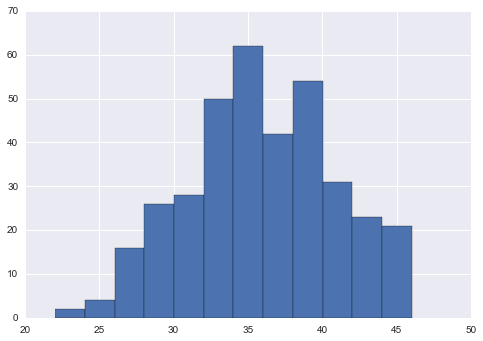

In [15]:
plt.hist(pp_occ.values,12)

(array([  1.,   0.,   0.,   1.,   1.,   3.,  11.,   9.,  22.,  39.,  29.,
         44.,  42.,  38.,  37.,  21.,  25.,  17.,   8.,  11.]),
 array([  0.  ,   0.65,   1.3 ,   1.95,   2.6 ,   3.25,   3.9 ,   4.55,
          5.2 ,   5.85,   6.5 ,   7.15,   7.8 ,   8.45,   9.1 ,   9.75,
         10.4 ,  11.05,  11.7 ,  12.35,  13.  ]),
 <a list of 20 Patch objects>)

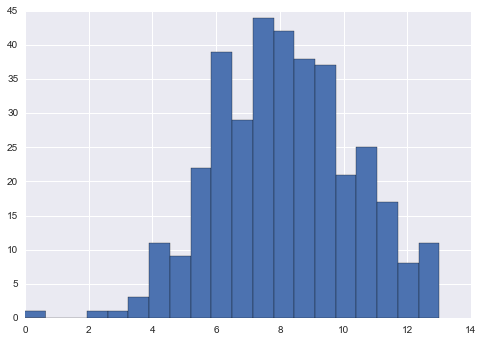

In [16]:
plt.hist(ldr_occ.values,20)

In [17]:
bydt_df.head()

,category,datetime,arrivals,departures,occupancy,day_of_week,bin_of_day,bin_of_week
0,LDR,2015-06-24,17,12,8.436771,2,0,2
1,LDR,2015-06-25,15,18,7.693773,3,0,3
2,LDR,2015-06-26,22,21,9.906759,4,0,4
3,LDR,2015-06-27,11,15,6.563241,5,0,5
4,LDR,2015-06-28,14,15,4.467477,6,0,6


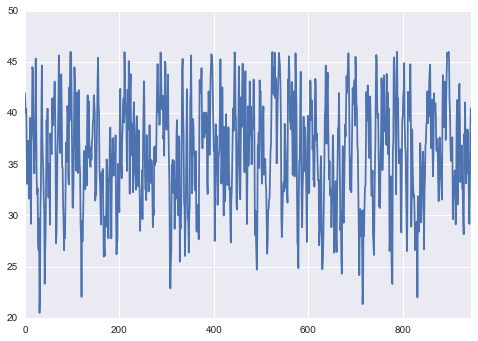

In [10]:
sns.tsplot(pp_occ);

In [32]:
pp_occ.head()

946    41.985243
947    40.804190
948    39.997558
949    40.432025
950    35.925370
Name: occupancy, dtype: float64

In [33]:
occ_df

,category,day_of_week,bin_of_day,count,max,mean,min,p50,p55,p60,p65,p70,p75,p80,p85,p90,p95,p975,p99,stdev
0,LDR,0,0,135,12.891366,7.984419,2.796759,7.720822,8.228215,8.595220,8.831941,9.171532,9.397662,9.869197,10.489184,11.033111,11.783839,12.132996,12.554980,2.181408
1,LDR,1,0,135,13.000000,8.230036,3.474745,8.092384,8.242804,8.470944,8.932141,9.299539,9.580023,9.918157,10.352272,10.915093,11.597917,12.728136,12.902694,2.046906
2,LDR,2,0,136,12.918009,8.144066,2.000000,8.163414,8.338695,8.533981,8.961140,9.328594,9.610564,10.099630,10.491646,10.854664,11.841606,12.358048,12.786104,2.121306
3,LDR,3,0,135,12.875243,8.408280,3.629352,8.463785,8.773997,9.020667,9.242135,9.678604,9.956875,10.488127,10.782909,11.263389,11.737558,12.120885,12.384748,2.098490
4,LDR,4,0,135,12.850544,8.424046,2.375741,8.401725,8.836523,9.129600,9.381046,9.591648,9.927517,10.293407,10.810131,11.301012,11.583255,12.083503,12.166122,2.142989
5,LDR,5,0,135,12.730498,8.138321,3.427373,7.931053,8.195449,8.535616,8.873404,9.068139,9.482662,9.733801,10.411692,10.906898,11.534293,11.949912,12.477259,1.940512
6,LDR,6,0,135,12.798495,8.308331,3.461505,8.316933,8.514780,8.731028,9.122241,9.315606,9.656620,10.069782,10.488385,11.100748,11.840792,12.359170,12.695952,2.039818
7,OBTot,0,0,135,58.312072,44.240580,32.207986,44.938137,45.654442,46.086981,46.621472,47.173657,47.777378,49.067007,50.312773,51.346285,53.838125,55.698014,56.525428,5.763216
8,OBTot,1,0,135,59.000000,44.509344,29.828657,45.239167,46.273299,46.602109,47.166617,47.507778,48.425787,49.093884,50.310515,52.097472,53.868200,54.859369,56.294068,5.859946
9,OBTot,2,0,136,58.326308,44.650573,29.872940,45.185909,46.155315,46.753565,47.937468,48.680897,49.369057,50.428646,50.892355,52.050064,53.626707,56.587617,57.801300,6.279447


## Computing occupancy statistics

Need to compute a bunch of output stats to use for visualization, metamodeling and to evaluate scenarios.

In [52]:
ldr_occ_stats = get_stats(ldr_occ)
pp_occ_stats = get_stats(pp_occ)

In [41]:
grp_all = stops_df.groupby(['PatientType','Unit'])

In [46]:
blocked_uncond_stats = grp_all['Entered_TriedToEnter'].apply(get_stats,'test_')
blocked_uncond_stats

PatientType  Unit               
1            LDR   test_count       4734.000000
                   test_max           10.052280
                   test_mean           0.217175
                   test_min            0.000000
                   test_num_gt_0     423.000000
                   test_p01            0.000000
                   test_p025           0.000000
                   test_p05            0.000000
                   test_p25            0.000000
                   test_p50            0.000000
                   test_p75            0.000000
                   test_p90            0.000000
                   test_p95            1.511892
                   test_p975           3.183598
                   test_p99            5.721315
                   test_stdev          0.964268
             Obs   test_count       4729.000000
                   test_max            0.000000
                   test_mean           0.000000
                   test_min            0.000000
       

In [43]:
grp_blocked = stops_df[(stops_df['Entered_TriedToEnter'] > 0)].groupby(['PatientType','Unit'])

In [45]:
blocked_cond_stats = grp_blocked['Entered_TriedToEnter'].apply(get_stats,'test_')
blocked_cond_stats

PatientType  Unit               
1            LDR   test_count       423.000000
                   test_max          10.052280
                   test_mean          2.430514
                   test_min           0.002380
                   test_num_gt_0    423.000000
                   test_p01           0.026150
                   test_p025          0.055455
                   test_p05           0.110433
                   test_p25           0.650557
                   test_p50           1.815509
                   test_p75           3.428580
                   test_p90           6.111076
                   test_p95           7.208529
                   test_p975          8.108493
                   test_p99           9.494679
                   test_stdev         2.244137
             PP    test_count       246.000000
                   test_max          12.258382
                   test_mean          3.016110
                   test_min           0.025138
                   test_num

In [48]:
blocked_cond_stats.index

MultiIndex(levels=[[1, 2], ['LDR', 'PP'], ['test_count', 'test_max', 'test_mean', 'test_min', 'test_num_gt_0', 'test_p01', 'test_p025', 'test_p05', 'test_p25', 'test_p50', 'test_p75', 'test_p90', 'test_p95', 'test_p975', 'test_p99', 'test_stdev']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]],
           names=['PatientType', 'Unit', None])

In [49]:
blocked_cond_stats[(1,'LDR','test_mean')]

2.4305144504988401

### Create dictionary to append to result data frame
Each new record (a scenario and rep) is stored in a dictionary. Then append the dictionary to the results dataframe.

In [53]:
newrec = {}
newrec['scenario'] = scenario_num
newrec['rep'] = rep_num

newrec['occ_mean_ldr'] = ldr_occ_stats['mean']

print(newrec)

{'scenario': '1', 'occ_mean_ldr': 8.1606601735788704, 'rep': '1'}


## Misc debugging cells

In [4]:
a_start = pd.Timestamp(start_analysis)
a_end = pd.Timestamp(end_analysis)
print(a_start,a_end)

2015-06-24 00:00:00 2016-06-16 00:00:00


In [5]:
left_PP_df = df[(df['EnteredTS'] < a_start) & (a_start <= df['ExitedTS']) &  (df['ExitedTS'] < a_end) & (df['Unit'] == 'PP')]

In [9]:
right_PP_df = df[(a_start <= df['EnteredTS']) & (df['EnteredTS'] < a_end) &  (df['ExitedTS'] >= a_end) & (df['Unit'] == 'PP')]

In [10]:
print(right_PP_df.shape)
right_PP_df[:][['EnteredTS','ExitedTS']]

(37, 17)


,EnteredTS,ExitedTS
25283,2016-06-11 09:09:53,2016-06-16 00:54:04
25286,2016-06-14 10:14:50,2016-06-16 01:21:06
25287,2016-06-14 23:06:20,2016-06-16 02:48:32
25294,2016-06-13 09:06:27,2016-06-16 06:08:35
25297,2016-06-15 03:07:51,2016-06-16 06:53:49
25312,2016-06-15 18:30:35,2016-06-16 13:05:38
25320,2016-06-13 21:05:12,2016-06-16 16:17:26
25327,2016-06-13 22:45:53,2016-06-16 18:11:57
25328,2016-06-14 17:21:16,2016-06-16 18:32:38
25342,2016-06-14 19:21:25,2016-06-16 21:59:03


In [39]:
print(left_PP_df.shape)
left_PP_df[:][['EnteredTS','ExitedTS']]

(30, 17)


,EnteredTS,ExitedTS
6558,2015-06-21 13:54:53,2015-06-24 00:20:17
6562,2015-06-22 13:42:20,2015-06-24 00:44:04
6567,2015-06-22 01:06:01,2015-06-24 04:27:04
6575,2015-06-21 15:20:06,2015-06-24 09:40:08
6576,2015-06-15 17:39:59,2015-06-24 09:47:58
6583,2015-06-20 11:16:04,2015-06-24 13:46:49
6586,2015-06-22 19:32:53,2015-06-24 16:39:49
6590,2015-06-23 20:59:23,2015-06-24 19:16:10
6592,2015-06-19 08:52:54,2015-06-24 19:54:19
6594,2015-06-19 19:10:27,2015-06-24 20:44:15
